# Multi-Axis signal filtering test

In this notebook, we check whether the filtering functions work for multi-axis data with shape (samples, channels).

## Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
from caits import filtering as filt
from caits import visualization as vis

## Step 2: Initialize data

In this example, we generate 3 signals, where 2 first two are sine signals of 5 and 50 Hz, while the 3rd signal is the sum of these + some noise.

In [2]:
sampling_rate = 1000
duration = 1.0

t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
n_samples = t.shape[0]

# Low-frequency sine (5 Hz)
ch1 = np.sin(2 * np.pi * 5 * t)

# High-frequency sine (50 Hz)
ch2 = np.sin(2 * np.pi * 50 * t)

# Mixed signal + noise
noise = 0.3 * np.random.randn(n_samples)
ch3 = ch1 + ch2 + noise

# Combine into shape (samples, channels)
data = np.stack((ch1, ch2, ch3), axis=-1)

data.shape

(1000, 3)

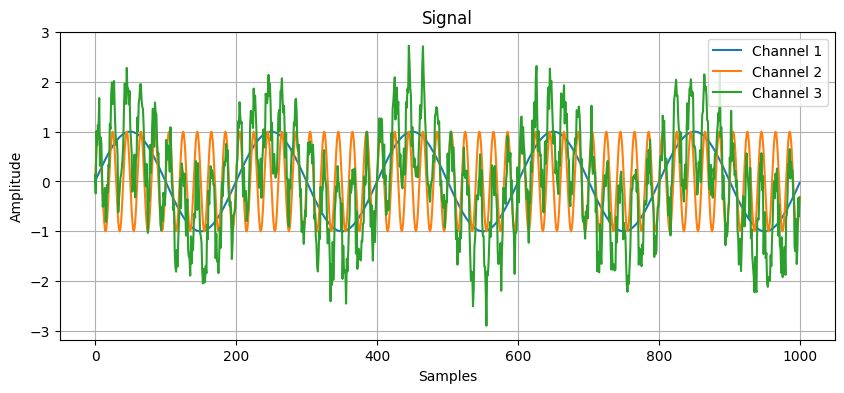

In [3]:
fig = vis.plot_signal(data, sr=sampling_rate)

## Step 3: Gaussian filter

In [6]:
gaussian_filtered_data = filt.gaussian_filter(data, sigma=[1, 0])
gaussian_filtered_data.shape

(1000, 3)

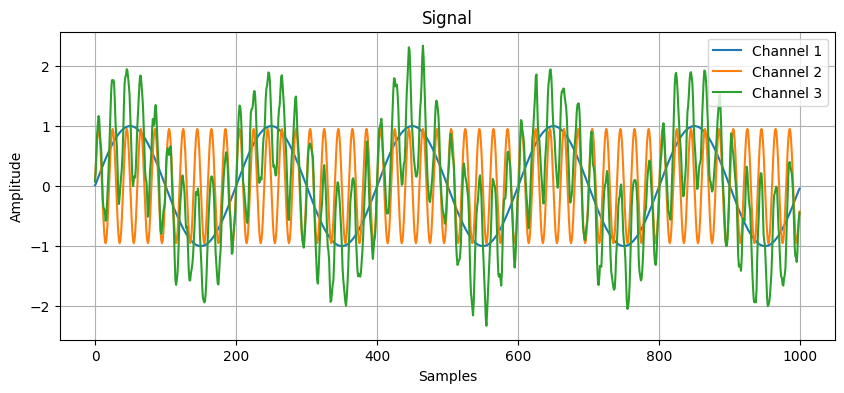

In [8]:
fig = vis.plot_signal(gaussian_filtered_data, sr=sampling_rate)

## Step 4: Butterworth (lowpass) filter

In [27]:
butterworth_low_filtered_data = filt.filter_butterworth(data, fs=sampling_rate, filter_type="lowpass", cutoff_freq=10)
butterworth_low_filtered_data.shape


(1000, 3)

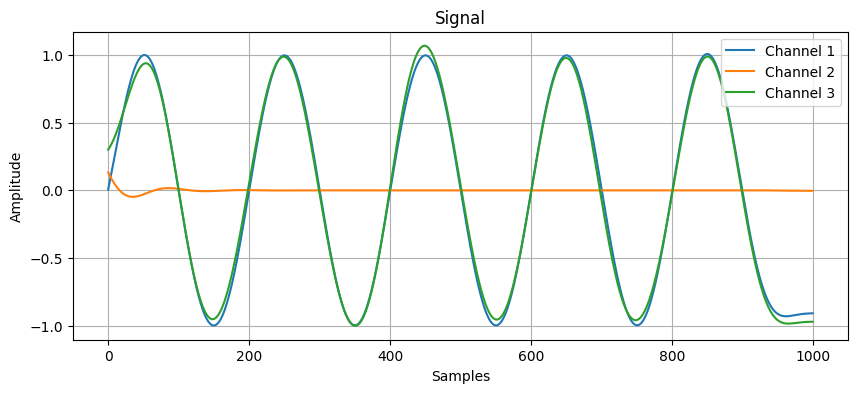

In [28]:
fig = vis.plot_signal(butterworth_low_filtered_data, sr=sampling_rate)


## Step 5: Butterworth (highpass) filter

In [29]:
butterworth_high_filtered_data = filt.filter_butterworth(data, fs=sampling_rate, filter_type="highpass", cutoff_freq=10)
butterworth_high_filtered_data.shape


(1000, 3)

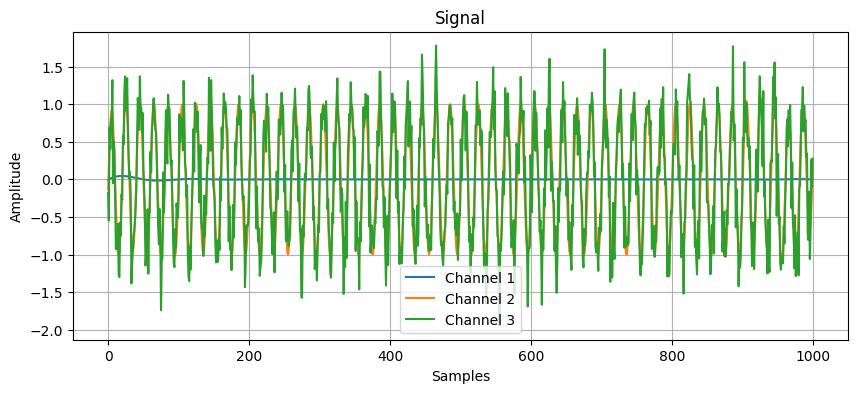

In [30]:
fig = vis.plot_signal(butterworth_high_filtered_data, sr=sampling_rate)

## Step 6: Butterworth (bandpass) filter

In [31]:
butterworth_band_filtered_data = filt.filter_butterworth(data, fs=sampling_rate, filter_type="bandpass", cutoff_freq=(3, 70))
butterworth_band_filtered_data.shape

(1000, 3)

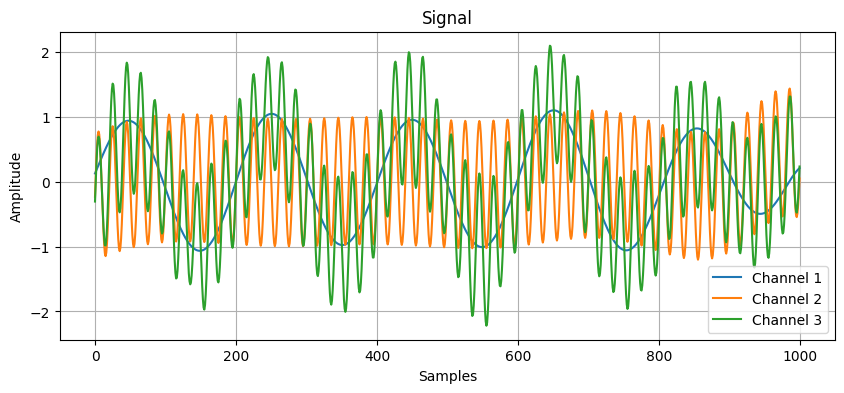

In [32]:
fig = vis.plot_signal(butterworth_band_filtered_data, sr=sampling_rate)

In [33]:
butterworth_band_filtered_data = filt.filter_butterworth(data, fs=sampling_rate, filter_type="bandpass", cutoff_freq=(10, 70))
butterworth_band_filtered_data.shape


(1000, 3)

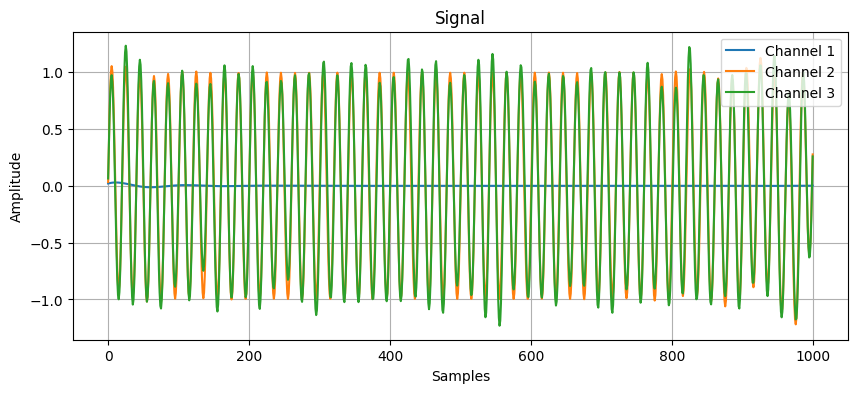

In [34]:
fig = vis.plot_signal(butterworth_band_filtered_data, sr=sampling_rate)

## Step 7: Median filter simple

In [50]:
median_filtered_data = filt.filter_median_simple(data, kernel_size=(13, 1))
median_filtered_data.shape

(1000, 3)

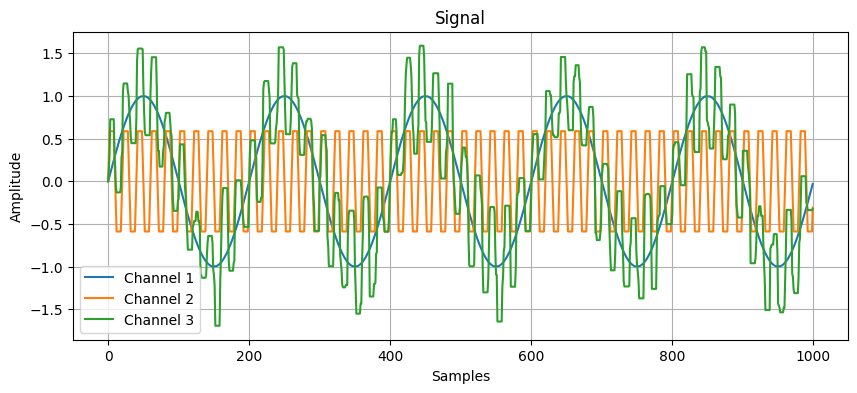

In [51]:
fig = vis.plot_signal(median_filtered_data, sr=sampling_rate)

## Step 8: Median filter gen

In [52]:
median_gen_filtered_data = filt.filter_median_gen(data, window_size=(13, 1))
median_gen_filtered_data.shape

(1000, 3)

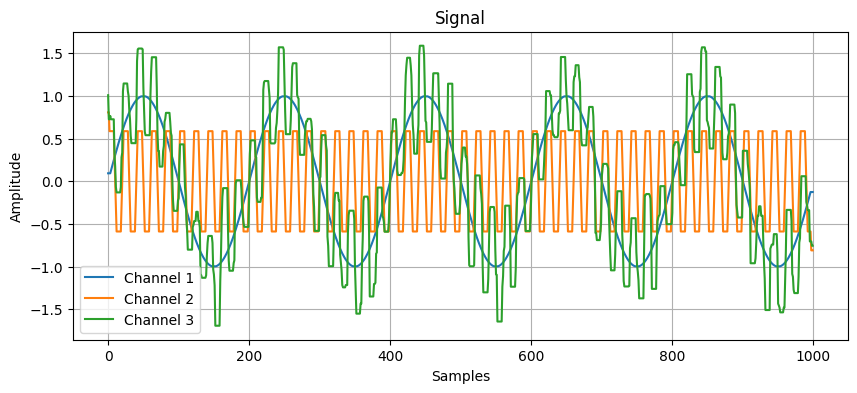

In [53]:
fig = vis.plot_signal(median_gen_filtered_data, sr=sampling_rate)

# Final Remarks

As it is shown, the function work as expected for multi-axis data. However, please note how the functions are used for multi-axis data.